<a href="https://colab.research.google.com/github/alchatman3/IDS/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files 
uploaded = files.upload()

Saving lifeExpectancy.csv to lifeExpectancy.csv


In [4]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['lifeExpectancy.csv'].decode('utf-8')))
df

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0
...,...,...,...,...,...,...,...,...,...,...,...
851,Zimbabwe,2011,54.9,464,6.00,63.750530,29.9,6.31,839.927936,14386649,10.1
852,Zimbabwe,2012,56.6,429,6.09,92.602336,3.3,6.69,955.648466,1471826,9.8
853,Zimbabwe,2013,58.0,399,6.39,10.666707,3.8,6.88,111.227396,155456,10.4
854,Zimbabwe,2014,59.2,371,6.50,10.822595,31.3,6.44,127.474620,15411675,10.3


In [6]:
from scipy.stats import pearsonr

data1 = df['Adult_Mortality']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.74702


In [8]:
data1 = df['Alcohol']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.43465


In [18]:
data1 = df['Percentage_Expenditure']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.38512


In [7]:
data1 = df['BMI']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.54135


In [10]:
data1 = df['Total_Expenditure']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.22808


In [19]:
data1 = df['GDP']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.46688


In [9]:
data1 = df['Schooling']
data2 = df['Life_Expectancy']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: 0.80523


In [15]:
from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt  # To visualize

# Reaf the CSV dataset
LRdata = pd.read_csv('lifeExpectancy.csv')

LRdata.head()

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0


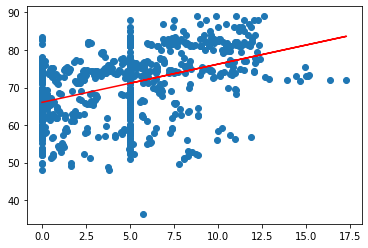

The slope:  [[1.01761535]]
The intercept:  [66.04133751]
MSE:  64.04517513323313
R2:  0.1889180091000392


In [37]:
X = LRdata.iloc[:, 4].values.reshape(-1,1)

Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

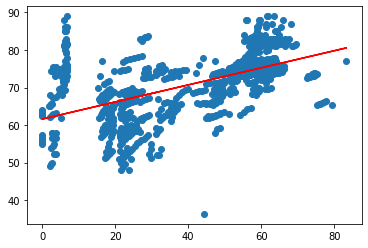

The slope:  [[0.22797897]]
The intercept:  [61.5756781]
MSE:  55.821455181843994
R2:  0.2930649824965613


In [38]:
X = LRdata.iloc[:, 6].values.reshape(-1,1)

Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

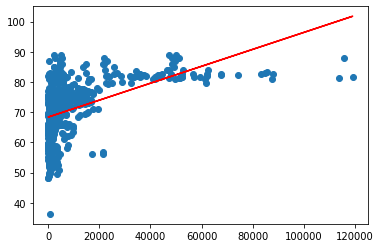

The slope:  [[0.00028027]]
The intercept:  [68.38946214]
MSE:  61.750715702938436
R2:  0.21797554105137174


In [39]:
X = LRdata.iloc[:, 8].values.reshape(-1,1)

Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))

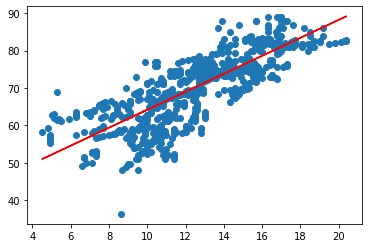

The slope:  [[2.40560564]]
The intercept:  [40.1365834]
MSE:  27.76334038138744
R2:  0.6483990348418267


In [40]:
X = LRdata.iloc[:, 10].values.reshape(-1,1)

Y = LRdata.iloc[:, 2].values.reshape(-1,1)

LRmodel = LinearRegression()  

LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()

print("The slope: ", LRmodel.coef_)
print("The intercept: ", LRmodel.intercept_)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))